<a href="https://colab.research.google.com/github/IaponaMother/Artificial_Neuron/blob/master/Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = _URL, extract=True)



68616192/68606236 [==============================] - 1s 0us/step


In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print(num_cats_tr)
print(num_dogs_tr)
print(num_cats_val)
print(num_dogs_val)
print(total_train)
print(total_val)

1000
1000
500
500
2000
1000


In [26]:
BATCH_SIZE = 100
IMG_SHAPE = 150
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
# train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')

# image_gen1 = ImageDataGenerator(rescale=1./255, horizontal_flip = True)
# train_data_gen1 = image_gen1.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle= True, target_size = (IMG_SHAPE, IMG_SHAPE))

# image_gen2 = ImageDataGenerator(rescale=1./255, zoom_range = 0.5)
# train_data_gen2 = image_gen2.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle= True, target_size = (IMG_SHAPE, IMG_SHAPE))

image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range =0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE, directory = train_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE, directory = validation_dir, shuffle = True, target_size = (IMG_SHAPE, IMG_SHAPE), class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


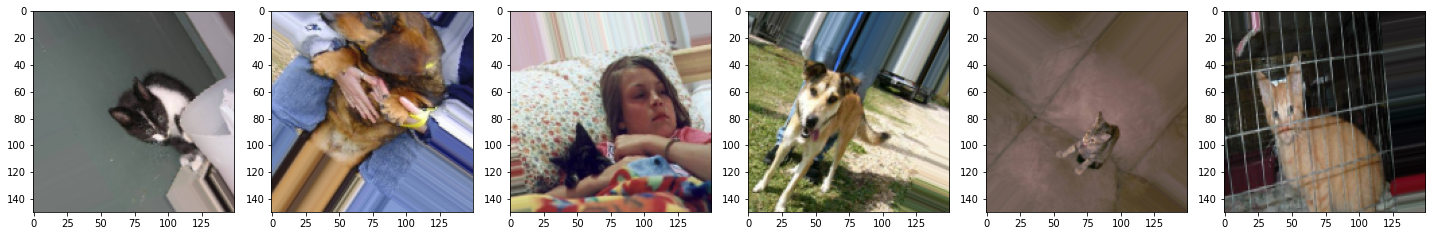

In [27]:
sample_training_images,_ = next(train_data_gen)
s = 6
def plotImages(images_arr):
  fig, axes = plt.subplots(1, s, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:s])

In [28]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_SHAPE, IMG_SHAPE, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [29]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs = 30,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
20/20 [==============================] - 21s 994ms/step - loss: 0.7227 - acc: 0.5020 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 2/30
20/20 [==============================] - 20s 985ms/step - loss: 0.6913 - acc: 0.5220 - val_loss: 0.6848 - val_acc: 0.5000
Epoch 3/30
20/20 [==============================] - 19s 972ms/step - loss: 0.6859 - acc: 0.5285 - val_loss: 0.6847 - val_acc: 0.5120
Epoch 4/30
20/20 [==============================] - 19s 979ms/step - loss: 0.6684 - acc: 0.5725 - val_loss: 0.6450 - val_acc: 0.6560
Epoch 5/30
20/20 [==============================] - 19s 976ms/step - loss: 0.6538 - acc: 0.6170 - val_loss: 0.6242 - val_acc: 0.6490
Epoch 6/30
20/20 [==============================] - 19s 974ms/step - loss: 0.6308 - acc: 0.6520 - val_loss: 0.6124 - val_acc: 0.6510
Epoch 7/30
20/20 [==============================] - 19s 971ms/step - loss: 0.6342 - acc: 0.6320 - val_loss: 0.7086 - val_acc: 0.5680
Epoch 8/30
20/20 [==============================] - 20s 981ms/step - 

ValueError: ignored

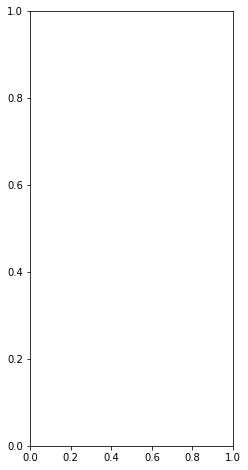

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(30, history.history['acc'], label = 'точность на обуч выборке')
plt.plot(30, history.history['val_acc'], label = 'точность на валидац выборке')
plt.legend(loc = 'lower right')
plt.title('точность')

plt.subplot(1, 2, 1)
plt.plot(30, history.history['loss'], label = 'потери на обуч выборке')
plt.plot(30, history.history['val_loss'], label = 'потери на валидац выборке')
plt.legend(loc = 'upper right')
plt.title('потери')
plt.savefig('./foo.png')
plt.show()